In [3]:
from linares_plot import *
import os

In [4]:
## in the local
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\Shuffle')

##Load shuffle neuron by neuron
shuffle_conditions = np.load('Shuffle_each_conditions.npy', encoding = 'latin1')
shuffle_conditions= shuffle_conditions[0]

shuffle_conditions_d = np.load('Shuffle_each_conditions_d.npy', encoding = 'latin1')
shuffle_conditions_d= shuffle_conditions_d[0]

os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons')

### Load data
cd_LIP_hm = np.load('cd_LIP_hm.npy')
cd_DLPFC_hm = np.load('cd_DLPFC_hm.npy')


In [28]:
def heatmap(data, title, fs1=20, fs2=15):
    ax = sns.heatmap(data,vmin=50, vmax=90, cmap= 'viridis_r',
                    cbar_kws={"shrink": .82, 'ticks' : [50, 70, 90], 'label': 'error ($^\circ$)'}) ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    plt.gca().set_title(title, fontsize=fs1)
    plt.gca().set_xticks([0,5,10,15,20])
    plt.gca().set_xticklabels([0,5,10,15,20])
    plt.gca().set_yticks([0,5,10,15,20])
    plt.gca().set_yticklabels([0,5,10,15,20])
    plt.xticks(fontsize=fs2)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('training time (s)', fontsize=fs1)
    plt.gca().set_xlabel('testing time (s)', fontsize=fs1)
    plt.show(block=False)
    



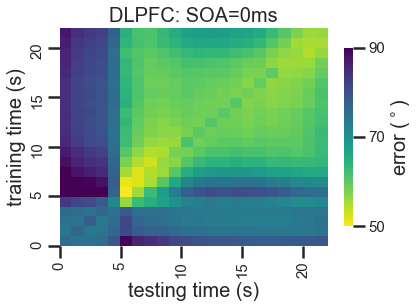

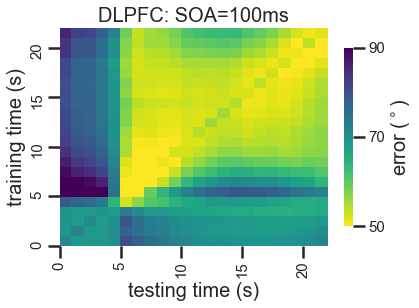

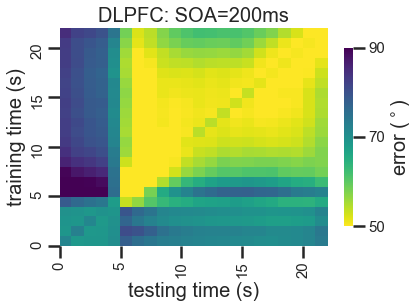

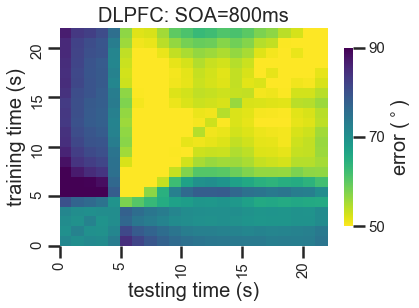

In [29]:
frames=[]
for idx, time in enumerate([0,100,200,800]):  
    PFC_x =  cd_DLPFC_hm[idx]
    frames.append(pd.DataFrame(PFC_x))
    heatmap(PFC_x, 'DLPFC: SOA=' +str(time)+'ms')

In [12]:
Mean_PFC = pd.concat(frames).groupby(level=0).mean()

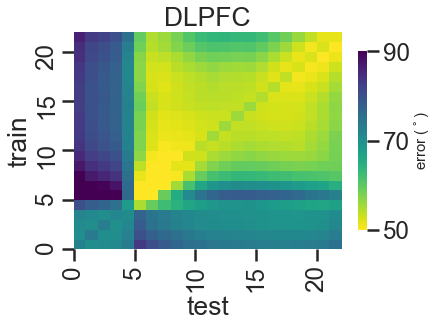

In [13]:
heatmap(Mean_PFC, 'DLPFC')